# Dataset Information

# Import Modules

In [2231]:

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2232]:
df = pd.read_csv('dataset/Lending_TRAINING_DATA.csv')
print(df.shape)
df.head().T

(7759, 46)


,0,1,2,3,4
APPLICATION.ID,27497000024,25556001005,27220000249,27067000029,26189000138
DSA.ID,JB02005,RD02622,SK02345,DN30900,JB02005
DEALER.ID,27497,25556,27220,27067,26189
APP.DATE,2017-02-28,2017-02-28,2017-02-28,2017-02-28,2017-02-28
TIME.STAMP,22:11:01,22:05:51,21:58:34,21:52:46,21:52:33
APPLICATION.STATUS,Declined,Approved,Approved,Declined,Approved
QUEUE.ID,Straight Through Process,Straight Through Process,Straight Through Process,Under.Writer,Straight Through Process
CURRENT.STAGE,PD_DE,PD_DE,PD_DE,DCLN,APRV
MARITAL.STATUS,Single,Married,Married,Married,Married
GENDER,Male,Male,Male,Male,Male


In [2233]:
#Categorical Features
cat_features=df.select_dtypes(include='object').columns
print("Categorical Features:\n",cat_features,"\n No of categorical features:",len(cat_features))

#Numerical Features
num_features=df.select_dtypes(exclude='object').columns
print("Numerical Features:\n",num_features,"\n No of numerical features:",len(num_features))

Categorical Features:
 Index(['DSA.ID', 'APP.DATE', 'TIME.STAMP', 'APPLICATION.STATUS', 'QUEUE.ID',
       'CURRENT.STAGE', 'MARITAL.STATUS', 'GENDER', 'EDUCATION',
       'RESIDENCE.TYPE', 'CITY', 'STATE', 'EMPLOY.CONSTITUTION', 'PAN.STATUS',
       'CIBIL.SCORE', 'APPLICATION.SCORE', 'ASSET.MAKE', 'ASSET.CTG',
       'LOAN.TYPE', 'CAR.CATEGORY', 'OWN.HOUSE.TYPE',
       'HOUSE.SURROGATE.DOCUMENT.TYPE', 'TRADER.BUSINESS.PROOF',
       'CREDIT.CARDS.CATEGORY', 'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE',
       'PRIMARY.ASSET.MODELNO', 'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR',
       'PAN', 'BANK_PASSBOOK'],
      dtype='object') 
 No of categorical features: 32
Numerical Features:
 Index(['APPLICATION.ID', 'DEALER.ID', 'AGE', 'ZIP.CODE',
       'NET.TAKE.HOME.SALARY', 'RESIDENTIAL.ADDRESS.SCORE',
       'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPROVED.AMOUNT',
       'APPLIED.AMOUNT', 'LOAN.TENOR', 'DEDUPE.REF.ID1',
       'TRADER.YEAR.IN.BUSINESS', 'CREDIT.CARD.NUMBER'],
      dtype='ob

# Preprocessing of Data

In [2234]:
# Statistics for numerical attributes
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
APPLICATION.ID,7759.0,2.653510e+10,1.001756e+09,2.505000e+10,2.564550e+10,2.638500e+10,2.749400e+10,2.877500e+10
DEALER.ID,7759.0,2.653510e+04,1.001757e+03,2.505000e+04,2.564550e+04,2.638500e+04,2.749400e+04,2.877500e+04
AGE,7759.0,3.569326e+01,9.391776e+00,1.200000e+01,2.800000e+01,3.400000e+01,4.200000e+01,6.700000e+01
ZIP.CODE,7759.0,5.201910e+05,1.344991e+05,1.100020e+05,4.520010e+05,5.200120e+05,6.250160e+05,8.433250e+05
NET.TAKE.HOME.SALARY,603.0,3.010201e+04,5.272895e+04,1.010000e+04,1.500000e+04,2.000000e+04,2.934500e+04,9.360000e+05
RESIDENTIAL.ADDRESS.SCORE,6135.0,6.194182e+01,3.185152e+01,0.000000e+00,5.877000e+01,7.434000e+01,8.301000e+01,1.000000e+02
OFFICE.ADDRESS.SCORE,6136.0,4.286547e+01,3.511225e+01,0.000000e+00,0.000000e+00,5.820500e+01,7.274250e+01,1.000000e+02
NAME.SCORE,2387.0,7.722744e+01,1.146160e+01,3.529000e+01,7.037000e+01,7.826000e+01,8.571000e+01,1.000000e+02
APPROVED.AMOUNT,3338.0,3.232197e+04,1.522981e+04,7.001000e+03,2.000000e+04,3.000000e+04,4.000000e+04,3.000000e+05
APPLIED.AMOUNT,7759.0,3.421163e+04,1.895216e+04,1.000000e+01,2.100000e+04,3.000000e+04,4.387000e+04,8.000000e+05


In [2235]:
# Other Information of Data
df.info()

# We have to convert all object datatype into numerical datatype(int/float). As ML model
# accept only numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.ID                 7759 non-null   int64  
 1   DSA.ID                         7759 non-null   object 
 2   DEALER.ID                      7759 non-null   int64  
 3   APP.DATE                       7759 non-null   object 
 4   TIME.STAMP                     7759 non-null   object 
 5   APPLICATION.STATUS             7759 non-null   object 
 6   QUEUE.ID                       7759 non-null   object 
 7   CURRENT.STAGE                  7759 non-null   object 
 8   MARITAL.STATUS                 7759 non-null   object 
 9   GENDER                         7759 non-null   object 
 10  AGE                            7759 non-null   int64  
 11  EDUCATION                      7759 non-null   object 
 12  RESIDENCE.TYPE                 7759 non-null   o

In [2236]:
# Check Null Values of each Column
df.isnull().sum()

APPLICATION.ID                      0
DSA.ID                              0
DEALER.ID                           0
APP.DATE                            0
TIME.STAMP                          0
APPLICATION.STATUS                  0
QUEUE.ID                            0
CURRENT.STAGE                       0
MARITAL.STATUS                      0
GENDER                              0
AGE                                 0
EDUCATION                           0
RESIDENCE.TYPE                      0
CITY                                0
STATE                               0
ZIP.CODE                            0
EMPLOY.CONSTITUTION                 0
NET.TAKE.HOME.SALARY             7156
PAN.STATUS                          1
CIBIL.SCORE                         0
APPLICATION.SCORE                   3
RESIDENTIAL.ADDRESS.SCORE        1624
OFFICE.ADDRESS.SCORE             1623
NAME.SCORE                       5372
APPROVED.AMOUNT                  4421
ASSET.MAKE                       4421
ASSET.CTG   

# Exploratory Data Analysis

### 1. Categorical Data Visualization

<AxesSubplot:xlabel='GENDER', ylabel='count'>

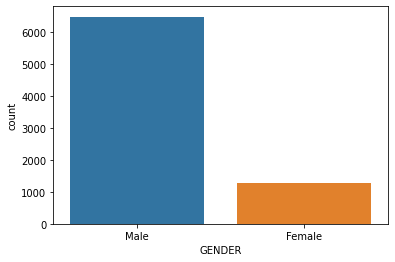

In [2237]:
#1 Count plot for GENDER
df['GENDER'] = df['GENDER'].str.title()
df['GENDER'].value_counts()
sns.countplot(df['GENDER'])

# Conclusion: Majority of applicant are male

Married    6257
Single     1502
Name: MARITAL.STATUS, dtype: int64


<AxesSubplot:xlabel='MARITAL.STATUS', ylabel='count'>

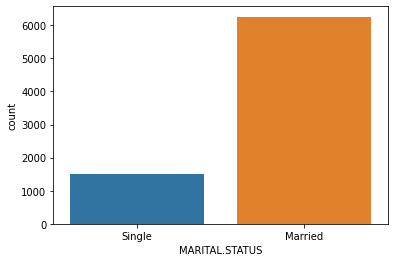

In [2238]:
#2 Count plot for MARITAL STATUS
print(df['MARITAL.STATUS'].value_counts())

# Replace 1 by single:
sns.countplot(df['MARITAL.STATUS'])
# Conclusion: Majority of applicant are Married


GRADUATE          4257
UNDER GRADUATE    1812
OTHERS            1227
POST-GRADUATE      419
PROFESSIONAL        32
DOCTORATE           12
Name: EDUCATION, dtype: int64


<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

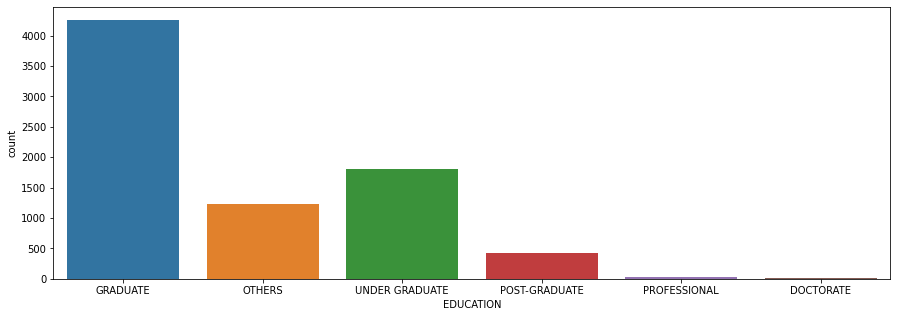

In [2239]:
#3 Count plot for EDUCATION
print(df['EDUCATION'].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(df['EDUCATION'])
# Conclusion: Majority of applicant are Graduate

<AxesSubplot:xlabel='EMPLOY.CONSTITUTION', ylabel='count'>

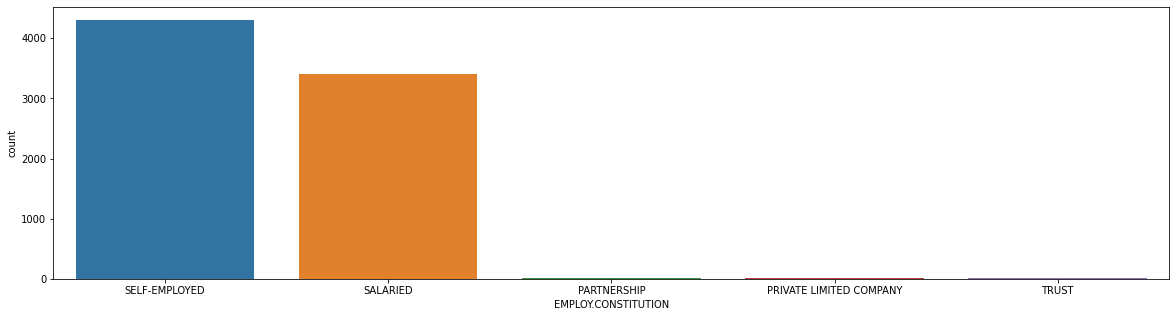

In [2240]:
#4 Count plot for EMPLOY CONSTITUTION
plt.figure(figsize=(20,5))
sns.countplot(df['EMPLOY.CONSTITUTION'])
# Conclusion: Majority of applicant are Self employed and salaried

<AxesSubplot:xlabel='RESIDENCE.TYPE', ylabel='count'>

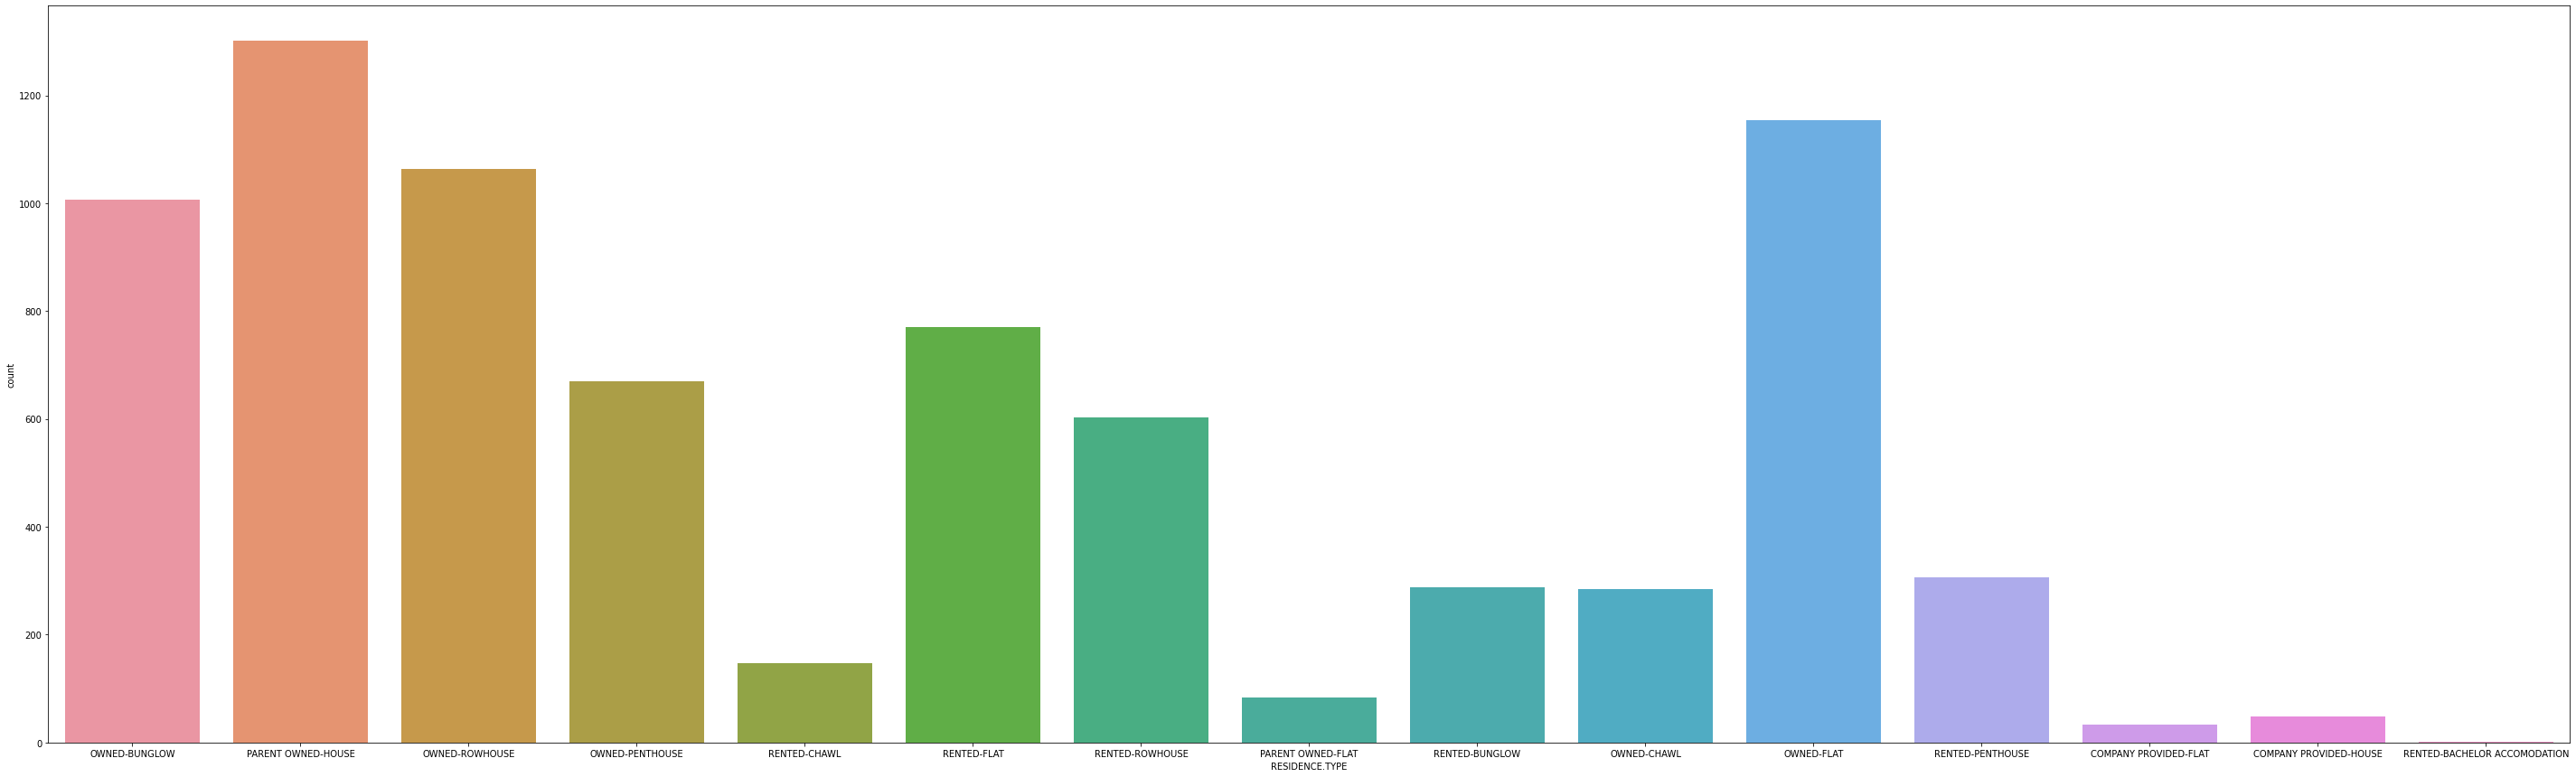

In [2241]:
#5 Count plot for RESIDENCE TYPE
plt.figure(figsize=(50,15))
sns.countplot(df['RESIDENCE.TYPE'])
# Conclusion: Majority of applicant are EDUCATION

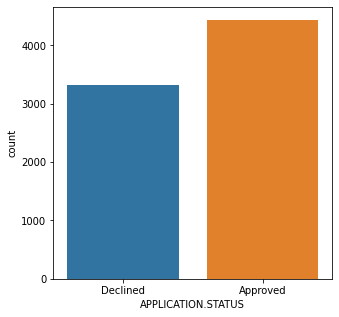

<AxesSubplot:ylabel='APPLICATION.STATUS'>

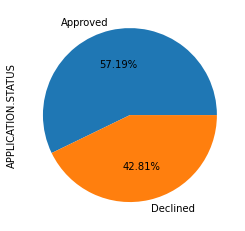

In [2242]:
#6 Count plot for Target Variable(APPLICATION.STATUS)
plt.figure(figsize=(5,5))
sns.countplot(df['APPLICATION.STATUS'])
plt.show()
df['APPLICATION.STATUS'].value_counts().plot(kind='pie',autopct="%1.2f%%")
#Conclusion: Dataset is balanced as difference between approved and declined is 14%

<AxesSubplot:xlabel='QUEUE.ID', ylabel='count'>

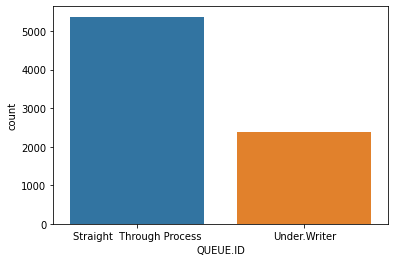

In [2243]:
#7 Count plot for QUEUE.ID
sns.countplot(df['QUEUE.ID'])


<AxesSubplot:xlabel='CURRENT.STAGE', ylabel='count'>

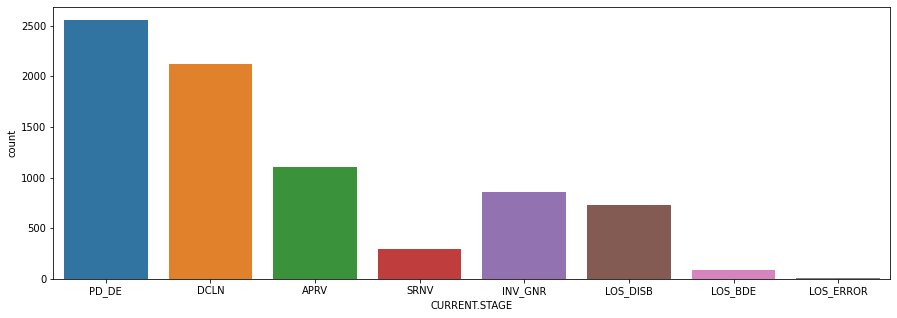

In [2244]:
#8 Count plot for CURRENT.STAGE

plt.figure(figsize=(15,5))
sns.countplot(df['CURRENT.STAGE'])
# Conclusion: Equally distributed 

0

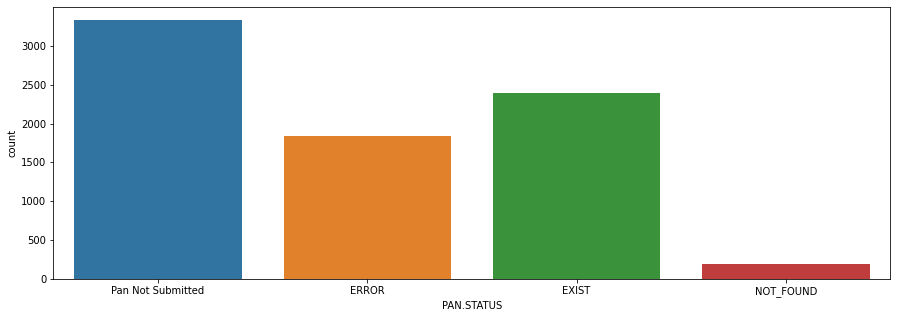

In [2245]:
# 9. Count Plot for PAN.STATUS
# Fill missing values by most frequent category using mode
most_frequent_category = df['PAN.STATUS'].mode()[0]

df['PAN.STATUS'] = df['PAN.STATUS'].fillna(most_frequent_category)
plt.figure(figsize=(15,5))
sns.countplot(df['PAN.STATUS'])
df['PAN.STATUS'].isnull().sum()

0    7399
1     360
Name: CREDIT.CARD.NUMBER, dtype: int64


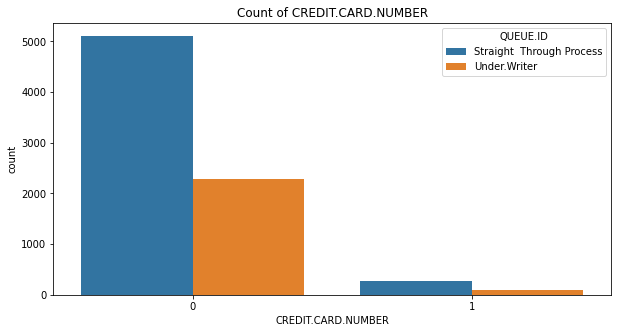

In [2246]:
# CREDIT.CARD.NUMBER: The first six digits of a credit card (including the MII) are used to identify the 
# issuing institution or bank. Institutions are assigned this unique identifier known
# as the Issuer Identifier Number (IIN), also sometimes called the Bank Number.

df.loc[df['CREDIT.CARD.NUMBER'] > 1, 'CREDIT.CARD.NUMBER'] = 1

## Fill all NaN values by 0
df['CREDIT.CARD.NUMBER'] = df['CREDIT.CARD.NUMBER'].fillna(0).astype('int')

print(df['CREDIT.CARD.NUMBER'].value_counts())
plt.figure(figsize=(10,5))
plt.title("Count of CREDIT.CARD.NUMBER")
sns.countplot(x="CREDIT.CARD.NUMBER", hue="QUEUE.ID", data=df)
plt.show()

### 2. Numerical Attribute Visualization

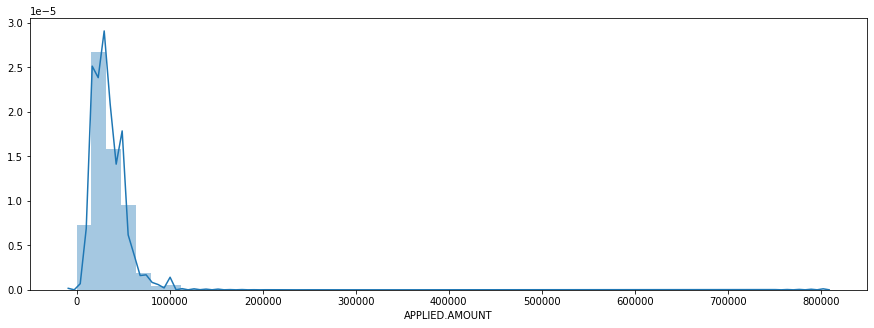

In [2247]:
plt.figure(figsize=(15,5))
sns.distplot(df['APPLIED.AMOUNT'])
plt.show()

# plt.show()
# The log transformation is used to transform skewed data to approximately conform
# to normality. If the original data follows a log-normal distribution or approximately 
# so, then the log-transformed data follows a normal or near normal distribution.

<AxesSubplot:>

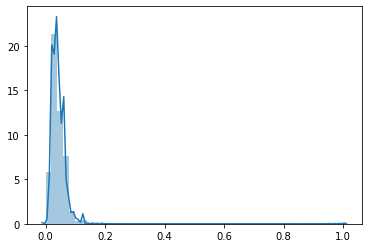

In [2248]:
# MinMax Scaler to normalize the distribution
minmax_scale = MinMaxScaler().fit(df[['APPLIED.AMOUNT']])
df_minmax = minmax_scale.transform(df[['APPLIED.AMOUNT']])
sns.distplot(df_minmax)

In [2249]:
# plt.figure(figsize=(15,5))
# df['TRADER.YEAR.IN.BUSINESS'] = df['TRADER.YEAR.IN.BUSINESS'].fillna(0).astype('int')
# sns.distplot(df['TRADER.YEAR.IN.BUSINESS'])
# plt.show()
# print(df['TRADER.YEAR.IN.BUSINESS'])
# minmax_scale = MinMaxScaler().fit(df[['TRADER.YEAR.IN.BUSINESS']])
# df_minmax = minmax_scale.transform(df[['TRADER.YEAR.IN.BUSINESS']])
# sns.distplot(df_minmax)

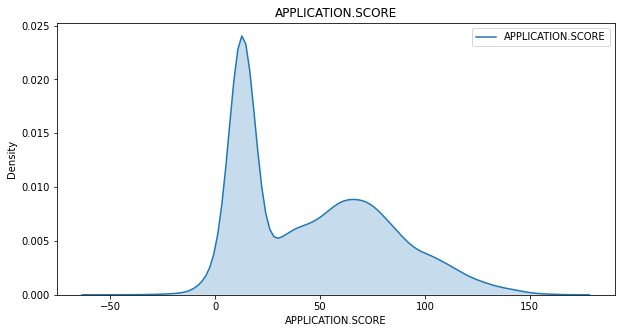

In [2250]:
df.loc[df['APPLICATION.SCORE'] == '-', 'APPLICATION.SCORE'] = 0
df.loc[df['APPLICATION.SCORE'] == 'RENGANATHAN MOHAN ', 'APPLICATION.SCORE'] = 0

df['APPLICATION.SCORE'] = df['APPLICATION.SCORE'].astype('float')


plt.figure(figsize=(10,5))
plt.title('APPLICATION.SCORE')
plt.xlabel('APPLICATION.SCORE')
plt.ylabel('Density')
sns.kdeplot(df['APPLICATION.SCORE'],shade=True)
plt.show()

0.00     2343
66.67      34
75.00      22
71.43      18
83.33      15
         ... 
67.32       1
47.56       1
73.88       1
90.52       1
78.23       1
Name: OFFICE.ADDRESS.SCORE, Length: 2060, dtype: int64


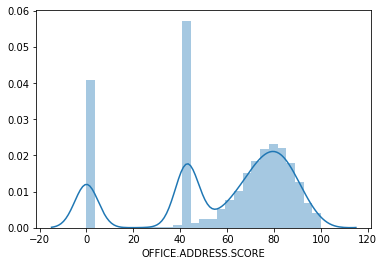

In [2251]:
# Fill OFFICE.ADDRESS.SCORE and RESIDENTIAL.ADDRESS.SCORE by its mean and NOT_AUTHORIZED
# string is replaced by NaN values

print(df['OFFICE.ADDRESS.SCORE'].value_counts())
df1 = df['OFFICE.ADDRESS.SCORE'].replace('NOT_AUTHORIZED',np.nan).astype('float')
df['OFFICE.ADDRESS.SCORE'] = df2.fillna(df1.mean()).astype('float')

sns.distplot(df['OFFICE.ADDRESS.SCORE'])
plt.show()

<AxesSubplot:xlabel='RESIDENTIAL.ADDRESS.SCORE'>

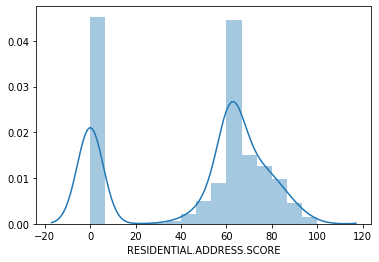

In [2252]:
df2 = df['RESIDENTIAL.ADDRESS.SCORE'].replace('NOT_AUTHORIZED',np.nan).astype('float')

df['RESIDENTIAL.ADDRESS.SCORE'] =  df1.fillna(df2.mean()).astype('float')
sns.distplot(df['RESIDENTIAL.ADDRESS.SCORE'])


<AxesSubplot:xlabel='APPLICATION.SCORE'>

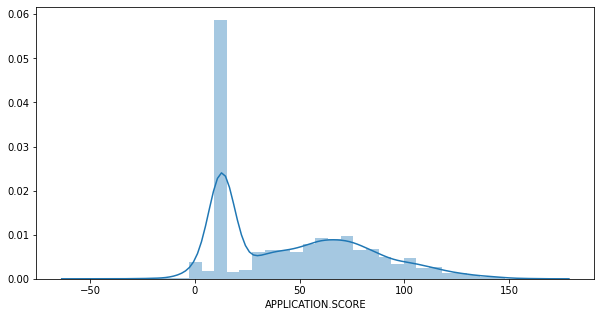

In [2253]:
plt.figure(figsize=(10,5))
df['APPLICATION.SCORE'].isnull().sum()
df['APPLICATION.SCORE'] = df['APPLICATION.SCORE'].fillna(0)

sns.distplot(df['APPLICATION.SCORE'])

000-1    2731
0         444
-         205
781        95
774        89
         ... 
557         1
470         1
567         1
458         1
499         1
Name: CIBIL.SCORE, Length: 392, dtype: int64


<AxesSubplot:title={'center':'CIBIL.SCORE'}>

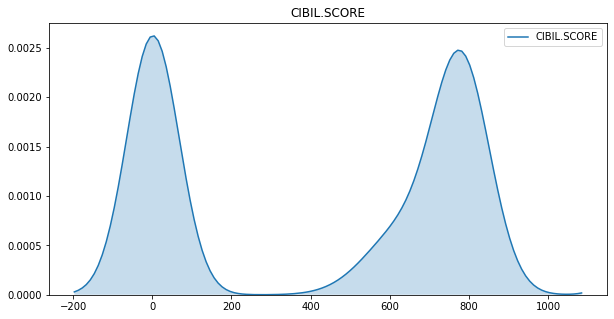

In [2254]:
# Plot for CIBIL Score
print(df['CIBIL.SCORE'].value_counts())

df1 = df['CIBIL.SCORE'].replace({'0':0,'-':1,'000-1':2}).astype('float')
df['CIBIL.SCORE'] = df1.fillna(df1.mean())

plt.figure(figsize=(10,5))
plt.title('CIBIL.SCORE')
sns.kdeplot(df['CIBIL.SCORE'],shade=True)

### Label Encoding

In [2255]:
#  Label Encoding is a popular encoding technique for handling categorical variables
df.dtypes

APPLICATION.ID                     int64
DSA.ID                            object
DEALER.ID                          int64
APP.DATE                          object
TIME.STAMP                        object
APPLICATION.STATUS                object
QUEUE.ID                          object
CURRENT.STAGE                     object
MARITAL.STATUS                    object
GENDER                            object
AGE                                int64
EDUCATION                         object
RESIDENCE.TYPE                    object
CITY                              object
STATE                             object
ZIP.CODE                           int64
EMPLOY.CONSTITUTION               object
NET.TAKE.HOME.SALARY             float64
PAN.STATUS                        object
CIBIL.SCORE                      float64
APPLICATION.SCORE                float64
RESIDENTIAL.ADDRESS.SCORE        float64
OFFICE.ADDRESS.SCORE             float64
NAME.SCORE                       float64
APPROVED.AMOUNT 

In [2256]:
# Binary Features
cat_features_binary = ['APPLICATION.STATUS','QUEUE.ID','GENDER',
                'MARITAL.STATUS','VOTER_ID','DRIVING_LICENSE','AADHAAR','PAN','BANK_PASSBOOK']

le=LabelEncoder()
for feature in cat_features_binary:
    df[feature]=le.fit_transform(df[feature])
df.head().T

# Multiple categorical features

cat_features = ['EMPLOY.CONSTITUTION','EDUCATION','CURRENT.STAGE','RESIDENCE.TYPE',
                'PAN.STATUS','OWN.HOUSE.TYPE','PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE','ASSET.MAKE','ASSET.CTG']
for feature in cat_features:
    df[feature]=le.fit_transform(df[feature])
df.head().T

,0,1,2,3,4
APPLICATION.ID,27497000024,25556001005,27220000249,27067000029,26189000138
DSA.ID,JB02005,RD02622,SK02345,DN30900,JB02005
DEALER.ID,27497,25556,27220,27067,26189
APP.DATE,2017-02-28,2017-02-28,2017-02-28,2017-02-28,2017-02-28
TIME.STAMP,22:11:01,22:05:51,21:58:34,21:52:46,21:52:33
APPLICATION.STATUS,1,0,0,1,0
QUEUE.ID,0,0,0,1,0
CURRENT.STAGE,6,6,6,1,0
MARITAL.STATUS,1,0,0,0,0
GENDER,1,1,1,1,1


### Drop Features


In [2257]:
features_drop = ['APPLICATION.ID','DSA.ID','DEALER.ID','APP.DATE','TIME.STAMP','CITY',
                'STATE','ZIP.CODE','CREDIT.CARDS.CATEGORY','TRADER.BUSINESS.PROOF',
                'PRIMARY.ASSET.MODELNO','CAR.CATEGORY','DEDUPE.REF.ID1','LOAN.TYPE',
                ]
df.drop(features_drop,axis = 1,inplace=True)

In [2258]:
features_drop = ['NET.TAKE.HOME.SALARY','HOUSE.SURROGATE.DOCUMENT.TYPE','APPROVED.AMOUNT',
                'NAME.SCORE','TRADER.YEAR.IN.BUSINESS']
df.drop(features_drop,axis = 1,inplace=True)

In [2259]:
df.isnull().sum()

APPLICATION.STATUS           0
QUEUE.ID                     0
CURRENT.STAGE                0
MARITAL.STATUS               0
GENDER                       0
AGE                          0
EDUCATION                    0
RESIDENCE.TYPE               0
EMPLOY.CONSTITUTION          0
PAN.STATUS                   0
CIBIL.SCORE                  0
APPLICATION.SCORE            0
RESIDENTIAL.ADDRESS.SCORE    0
OFFICE.ADDRESS.SCORE         0
ASSET.MAKE                   0
ASSET.CTG                    0
APPLIED.AMOUNT               0
LOAN.TENOR                   0
OWN.HOUSE.TYPE               0
CREDIT.CARD.NUMBER           0
PRIMARY.ASSET.CTG            0
PRIMARY.ASSET.MAKE           0
VOTER_ID                     0
DRIVING_LICENSE              0
AADHAAR                      0
PAN                          0
BANK_PASSBOOK                0
dtype: int64

<AxesSubplot:>

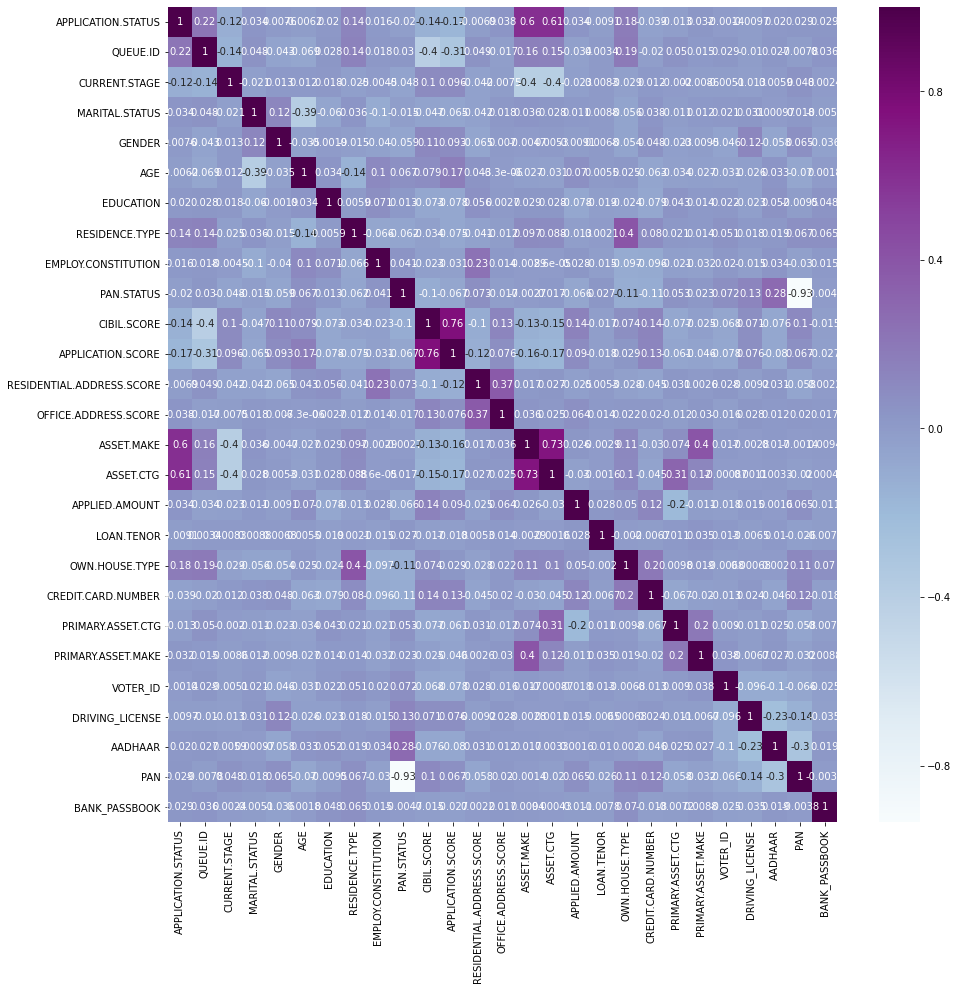

In [2278]:
### COorelation Matrix
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot = True,cmap='BuPu')

In [2261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   APPLICATION.STATUS         7759 non-null   int64  
 1   QUEUE.ID                   7759 non-null   int64  
 2   CURRENT.STAGE              7759 non-null   int64  
 3   MARITAL.STATUS             7759 non-null   int64  
 4   GENDER                     7759 non-null   int64  
 5   AGE                        7759 non-null   int64  
 6   EDUCATION                  7759 non-null   int64  
 7   RESIDENCE.TYPE             7759 non-null   int64  
 8   EMPLOY.CONSTITUTION        7759 non-null   int64  
 9   PAN.STATUS                 7759 non-null   int64  
 10  CIBIL.SCORE                7759 non-null   float64
 11  APPLICATION.SCORE          7759 non-null   float64
 12  RESIDENTIAL.ADDRESS.SCORE  7759 non-null   float64
 13  OFFICE.ADDRESS.SCORE       7759 non-null   float

## Training data preparation

In [2262]:
X = df.drop(['QUEUE.ID','APPLICATION.STATUS'],axis = 1)
y = df['QUEUE.ID'] # Classifies Straight through process and Under writing
X.head()

,CURRENT.STAGE,MARITAL.STATUS,GENDER,AGE,EDUCATION,RESIDENCE.TYPE,EMPLOY.CONSTITUTION,PAN.STATUS,CIBIL.SCORE,APPLICATION.SCORE,...,LOAN.TENOR,OWN.HOUSE.TYPE,CREDIT.CARD.NUMBER,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK
0,6,1,1,30,1,2,3,3,734.0,69.0,...,10,4,0,39,38,0,0,1,0,0
1,6,0,1,38,2,8,3,3,840.0,108.0,...,12,1,0,45,42,0,1,0,0,0
2,6,0,1,52,1,6,3,3,863.0,143.0,...,12,2,0,0,10,0,1,0,0,0
3,1,0,1,57,1,2,3,3,2.0,60.0,...,12,2,0,13,46,0,0,1,0,0
4,0,0,1,38,1,2,2,0,797.0,62.0,...,10,2,0,44,10,0,0,0,1,0


In [2263]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = X
x_test = X
y_train = y
y_test = y

# Model Building

## 1. Logistic Regression Classifier

In [2264]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7698156978992138
Confusion Matrix:
 [[4653  719]
 [1067 1320]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      5372
           1       0.65      0.55      0.60      2387

    accuracy                           0.77      7759
   macro avg       0.73      0.71      0.72      7759
weighted avg       0.76      0.77      0.76      7759



## 2. Decision Tree Classifier

In [2265]:

# Test Data Accuracy
dtree = DecisionTreeClassifier(random_state=17,max_depth=5)
dtree.fit(x_train,y_train)
y_pred_dt=dtree.predict(x_test)

print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

0.8872277355329296
[[5125  247]
 [ 628 1759]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5372
           1       0.88      0.74      0.80      2387

    accuracy                           0.89      7759
   macro avg       0.88      0.85      0.86      7759
weighted avg       0.89      0.89      0.88      7759



#### Decision Tree Classifier with Cross Validation

In [2266]:
cv_score=cross_val_score(dtree,X,y,cv=10)
print("Accuracy:",np.mean(cv_score))

Accuracy: 0.8800088127702029


## 3. Random Forest Classifier

In [2268]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

1.0
[[5372    0]
 [   0 2387]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00      2387

    accuracy                           1.00      7759
   macro avg       1.00      1.00      1.00      7759
weighted avg       1.00      1.00      1.00      7759



#### Random Forest CLassifier with Cross Validation

In [2099]:
cv_score=cross_val_score(rfc,X,y,cv=10)
print("Accuracy:",cv_score)

Accuracy: [0.98582474 0.98840206 0.9935567  0.98582474 0.98840206 0.9871134
 0.9935567  0.99613402 0.98840206 0.99225806]


## 3.1 Accuracy improvement using Hyper Parameter Tuning

### 3.1.1 Hyper Parameter Tuning for Random Forest algorithm using GridSearchCV

In [2061]:
param_grid = [
{'n_estimators': [10, 500], 'max_features': [5, 100], 
 'max_depth': [4, 30, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rfc, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

y_pred = grid_search_forest.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
# Conclusion : Accuracy incresed after hyperparameter tuning

Accuracy: 1.0
Confusion Matrix:
 [[5372    0]
 [   0 2387]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00      2387

    accuracy                           1.00      7759
   macro avg       1.00      1.00      1.00      7759
weighted avg       1.00      1.00      1.00      7759



### 3.1.2 Hyper Parameter Tuning for Random Forest algorithm using RandomizedSearchCV

In [1975]:
# Use the random grid to search for best hyperparameters
random_grid = {'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

# The key 'params' is used to store a list of parameter settings dicts for all the
# parameter candidates.

y_pred= rf_random.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("classification_report:\n",classification_report(y_test,y_pred))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Accuracy: 0.9885294496713494
Confusion Matrix:
 [[5358   14]
 [  75 2312]]
classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5372
           1       0.99      0.97      0.98      2387

    accuracy                           0.99      7759
   macro avg       0.99      0.98      0.99      7759
weighted avg       0.99      0.99      0.99      7759



## 4. MLP Classifier

In [2063]:
#Feature Scaling
rs=MinMaxScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

#Initialize the Multi Layer Perceptron Classifier
#model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model=MLPClassifier()
#Train the model
model.fit(x_train,y_train)

#Predict for the test set
y_pred=model.predict(x_test)

#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 84.62%


## 5. AdaBoostClassifier

In [2071]:
#Without CV 
adb=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=100)
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[5372    0]
 [   0 2387]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00      2387

    accuracy                           1.00      7759
   macro avg       1.00      1.00      1.00      7759
weighted avg       1.00      1.00      1.00      7759



#### AdaBoost Classifier with Cross Validation

In [2069]:
#With CV 
# adb=AdaBoostClassifier()
cv_score=cross_val_score(adb,X,y,cv=10)
print("Accuracy:",np.mean(cv_score))

Accuracy: 0.8556499833721316


# Accuracy of Application status for Straight through Process and Under Writing

## 1. Decision Tree 

### 1.1 Decision Tree algorithm for Straight Through Process


In [2211]:
df['QUEUE.ID'] = y_pred_dt
new_df = df.loc[df['QUEUE.ID'] == 0]
new_df.drop(['QUEUE.ID'],axis = 1,inplace = True)
X = new_df.drop(['APPLICATION.STATUS'],axis = 1)
y = new_df['APPLICATION.STATUS']  # Target Variable
print(X.shape)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
dtree_stp = DecisionTreeClassifier(random_state=17,max_depth=5)
dtree_stp.fit(X,y)
y_pred=dtree_stp.predict(X)
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

(5753, 25)
0.9993047105857813
[[3691    3]
 [   1 2058]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3694
           1       1.00      1.00      1.00      2059

    accuracy                           1.00      5753
   macro avg       1.00      1.00      1.00      5753
weighted avg       1.00      1.00      1.00      5753



### 1.2 Accuracy of Decision Tree algorithm for Under Writing

In [2212]:
# Accuracy  of Under Writing
new_df = df.loc[df['QUEUE.ID'] == 1] # Under Writing
new_df.drop(['QUEUE.ID'],axis = 1,inplace = True)
X = new_df.drop(['APPLICATION.STATUS'],axis = 1)
y = new_df['APPLICATION.STATUS']

print(X.shape)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree_uw = DecisionTreeClassifier(random_state=17,max_depth=5)
dtree_uw.fit(X,y)
y_pred=dtree_uw.predict(X)
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

(2006, 25)
0.9995014955134596
[[ 742    1]
 [   0 1263]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00      1263

    accuracy                           1.00      2006
   macro avg       1.00      1.00      1.00      2006
weighted avg       1.00      1.00      1.00      2006



## 2. Random Forest CLassifier

### 2.1 Random Forest Algorithm for Straight through process

In [2269]:
df['QUEUE.ID'] = y_pred_rfc
new_df = df.loc[df['QUEUE.ID'] == 0] # Straight  Through Process
new_df.drop(['QUEUE.ID'],axis = 1,inplace = True)
X = new_df.drop(['APPLICATION.STATUS'],axis = 1)
y = new_df['APPLICATION.STATUS']
print(X.shape)

rfc_stp = RandomForestClassifier()
rfc_stp.fit(X,y)
y_pred= rfc_stp.predict(X)

print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

(5372, 25)
0.9998138495904692
[[3454    0]
 [   1 1917]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3454
           1       1.00      1.00      1.00      1918

    accuracy                           1.00      5372
   macro avg       1.00      1.00      1.00      5372
weighted avg       1.00      1.00      1.00      5372



### 2.2 Random Forest algorithm for Under Writing


In [2279]:
new_df = df.loc[df['QUEUE.ID'] == 1] # Under Writing 
new_df.drop(['QUEUE.ID'],axis = 1,inplace = True)
X = new_df.drop(['APPLICATION.STATUS'],axis = 1)
y = new_df['APPLICATION.STATUS']
print(X.shape)

rfc_uw = RandomForestClassifier()
rfc_uw.fit(X,y)
y_pred= rfc_uw.predict(X)

print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

(2387, 25)
1.0
[[ 983    0]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00      1404

    accuracy                           1.00      2387
   macro avg       1.00      1.00      1.00      2387
weighted avg       1.00      1.00      1.00      2387



In [2282]:
current_path = os.getcwd()
file_path=os.path.join(current_path,'model','loan_predict.pkl')
file=open(file_path,"wb")
pickle.dump([rfc,rfc_stp,rfc_uw],file)

# Model Application on Given Testing Dataset:

In [2215]:
test_df = pd.read_csv('dataset/Lending_TEST_DATA.csv')
test_df.shape

(19189, 46)

In [2148]:
# Approved amount is used only for calculating accuracy 
test_df['APPROVED.AMOUNT']
test_df.loc[test_df['APPROVED.AMOUNT'] > 1, 'APPROVED.AMOUNT'] = 0

## Fill all NaN values by 0
test_df['APPLICATION.STATUS'] = test_df['APPROVED.AMOUNT'].fillna(1).astype('int')
test_df['APPLICATION.STATUS'].value_counts()  
 

1    10199
0     8990
Name: APPLICATION.STATUS, dtype: int64

In [2149]:
features_drop = ['APPLICATION.ID','DSA.ID','DEALER.ID','APP.DATE','TIME.STAMP','CITY',
                'STATE','ZIP.CODE','CREDIT.CARDS.CATEGORY','TRADER.BUSINESS.PROOF',
                'PRIMARY.ASSET.MODELNO','CAR.CATEGORY','DEDUPE.REF.ID1','LOAN.TYPE']

test_df.drop(features_drop,axis = 1,inplace=True)

In [2150]:
features_drop = ['NET.TAKE.HOME.SALARY','HOUSE.SURROGATE.DOCUMENT.TYPE','APPROVED.AMOUNT',
                'NAME.SCORE','TRADER.YEAR.IN.BUSINESS']

test_df.drop(features_drop,axis = 1,inplace=True)

In [2151]:
most_frequent_category = test_df['PAN.STATUS'].mode()[0]
test_df['PAN.STATUS'] = test_df['PAN.STATUS'].fillna(most_frequent_category)
test_df['PAN.STATUS'].isna().sum()


0

In [2152]:
test_df.loc[test_df['CREDIT.CARD.NUMBER'] > 1, 'CREDIT.CARD.NUMBER'] = 1
test_df['CREDIT.CARD.NUMBER'] = test_df['CREDIT.CARD.NUMBER'].fillna(0).astype('int')


In [2153]:
test_df.loc[test_df['APPLICATION.SCORE'] == '-', 'APPLICATION.SCORE'] = 0
test_df.loc[test_df['APPLICATION.SCORE'] == 'RENGANATHAN MOHAN ', 'APPLICATION.SCORE'] = 0
test_df['APPLICATION.SCORE'] = test_df['APPLICATION.SCORE'].astype('float')

In [2154]:
print(test_df['OFFICE.ADDRESS.SCORE'].value_counts())
test_df1 = test_df['OFFICE.ADDRESS.SCORE'].replace('NOT_AUTHORIZED',np.nan).astype('float')
test_df2 = test_df['RESIDENTIAL.ADDRESS.SCORE'].replace('NOT_AUTHORIZED',np.nan).astype('float')
test_df['OFFICE.ADDRESS.SCORE'] = test_df1.fillna(test_df1.mean()).astype('float')
test_df['RESIDENTIAL.ADDRESS.SCORE'] =  test_df2.fillna(test_df2.mean()).astype('float')

0                 5024
0.0                874
NOT_AUTHORIZED     566
66.67               52
75                  41
                  ... 
62.7                 1
46.61                1
78.75                1
63.13                1
59.2                 1
Name: OFFICE.ADDRESS.SCORE, Length: 3939, dtype: int64


In [2155]:
test_df['APPLICATION.SCORE'].isnull().sum()
test_df['APPLICATION.SCORE'] = test_df['APPLICATION.SCORE'].fillna(0)

In [2156]:
test_df1 = test_df['CIBIL.SCORE'].replace({'0':0,'-':1,'000-1':2}).astype('float')
test_df['CIBIL.SCORE'] = test_df1.fillna(test_df1.mean())

In [2157]:
# Binary Features
cat_features_binary = ['APPLICATION.STATUS','QUEUE.ID','GENDER',
                'MARITAL.STATUS','VOTER_ID','DRIVING_LICENSE','AADHAAR','PAN','BANK_PASSBOOK']

le=LabelEncoder()
for feature in cat_features_binary:
    test_df[feature]=le.fit_transform(test_df[feature])
test_df.head().T

# Multiple categorical features

cat_features = ['EMPLOY.CONSTITUTION','EDUCATION','CURRENT.STAGE','RESIDENCE.TYPE',
                'PAN.STATUS','OWN.HOUSE.TYPE','PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE','ASSET.MAKE','ASSET.CTG']
for feature in cat_features:
    test_df[feature]=le.fit_transform(test_df[feature])
test_df.head().T

,0,1,2,3,4
APPLICATION.STATUS,0.0,0.00,1.00,0.0,0.0
QUEUE.ID,0.0,0.00,0.00,0.0,0.0
CURRENT.STAGE,7.0,7.00,2.00,7.0,3.0
MARITAL.STATUS,0.0,0.00,0.00,0.0,1.0
GENDER,1.0,1.00,1.00,1.0,1.0
AGE,29.0,48.00,33.00,31.0,24.0
EDUCATION,5.0,5.00,2.00,5.0,5.0
RESIDENCE.TYPE,10.0,3.00,2.00,2.0,12.0
EMPLOY.CONSTITUTION,3.0,3.00,3.00,2.0,2.0
PAN.STATUS,3.0,3.00,3.00,0.0,0.0


# Model Accuracy on new data

In [2158]:
test_X = test_df.drop(['QUEUE.ID','APPLICATION.STATUS'],axis = 1)
test_y = test_df['QUEUE.ID']
test_X.head().T


,0,1,2,3,4
CURRENT.STAGE,7.0,7.00,2.00,7.0,3.0
MARITAL.STATUS,0.0,0.00,0.00,0.0,1.0
GENDER,1.0,1.00,1.00,1.0,1.0
AGE,29.0,48.00,33.00,31.0,24.0
EDUCATION,5.0,5.00,2.00,5.0,5.0
RESIDENCE.TYPE,10.0,3.00,2.00,2.0,12.0
EMPLOY.CONSTITUTION,3.0,3.00,3.00,2.0,2.0
PAN.STATUS,3.0,3.00,3.00,0.0,0.0
CIBIL.SCORE,776.0,796.00,0.00,817.0,804.0
APPLICATION.SCORE,65.0,60.00,38.00,73.0,115.0


## 1. Random Forest Algorithm Accuracy

In [2173]:
x_test = test_X.copy()
y_test = test_y
print(x_test.shape,y_test.shape)
y_pred_rf = rfc.predict(x_test)

print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


(19189, 25) (19189,)
0.9941633227369847
[[13965    29]
 [   83  5112]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13994
           1       0.99      0.98      0.99      5195

    accuracy                           0.99     19189
   macro avg       0.99      0.99      0.99     19189
weighted avg       0.99      0.99      0.99     19189



## Accuracy  of Straight Through Process using Random Forest

In [2161]:
test_df['QUEUE.ID'] = y_pred
new_df = test_df.loc[test_df['QUEUE.ID'] == 0] # Under Writing
print(new_df.shape)
new_df.drop(['QUEUE.ID'],axis = 1,inplace = True)
X = new_df.drop(['APPLICATION.STATUS'],axis = 1)
y = new_df['APPLICATION.STATUS']

x_test = X
y_test = y
print(x_test.shape, y_test.shape)

y_pred= rfc_stp.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

(13994, 27)
(13994, 25) (13994,)
0.895883950264399
[[7374   11]
 [1446 5163]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7385
           1       1.00      0.78      0.88      6609

    accuracy                           0.90     13994
   macro avg       0.92      0.89      0.89     13994
weighted avg       0.91      0.90      0.89     13994



## Accuracy of Under Writing using Random Forest

In [2139]:
new_df = test_df.loc[test_df['QUEUE.ID'] == 1] # Under Writing
print(new_df.shape)
new_df.drop(['QUEUE.ID'],axis = 1,inplace = True)
X = new_df.drop(['APPLICATION.STATUS'],axis = 1)
y = new_df['APPLICATION.STATUS']

x_test = X
y_test = y
print(x_test.shape, y_test.shape)

y_pred= rfc_uw.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


(6399, 27)
(6399, 25) (6399,)
0.9088920143772464
[[2148   21]
 [ 562 3668]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2169
           1       0.99      0.87      0.93      4230

    accuracy                           0.91      6399
   macro avg       0.89      0.93      0.90      6399
weighted avg       0.93      0.91      0.91      6399



In [2277]:
def preprocess_data(test_df):
    test_df.loc[test_df['APPROVED.AMOUNT'] > 1, 'APPROVED.AMOUNT'] = 0
    test_df['APPLICATION.STATUS'] = test_df['APPROVED.AMOUNT'].fillna(1).astype('int')
    features_drop = ['APPLICATION.ID','DSA.ID','DEALER.ID','APP.DATE','TIME.STAMP','CITY',
                'STATE','ZIP.CODE','CREDIT.CARDS.CATEGORY','TRADER.BUSINESS.PROOF',
                'PRIMARY.ASSET.MODELNO','CAR.CATEGORY','DEDUPE.REF.ID1','LOAN.TYPE']

    test_df.drop(features_drop,axis = 1,inplace=True)
    features_drop = ['NET.TAKE.HOME.SALARY','HOUSE.SURROGATE.DOCUMENT.TYPE','APPROVED.AMOUNT',
                'NAME.SCORE','TRADER.YEAR.IN.BUSINESS']

    test_df.drop(features_drop,axis = 1,inplace=True)
    most_frequent_category = test_df['PAN.STATUS'].mode()[0]
    test_df['PAN.STATUS'] = test_df['PAN.STATUS'].fillna(most_frequent_category)
    test_df.loc[test_df['CREDIT.CARD.NUMBER'] > 1, 'CREDIT.CARD.NUMBER'] = 1
    test_df['CREDIT.CARD.NUMBER'] = test_df['CREDIT.CARD.NUMBER'].fillna(0).astype('int')
    
    test_df.loc[test_df['APPLICATION.SCORE'] == '-', 'APPLICATION.SCORE'] = 0
    test_df.loc[test_df['APPLICATION.SCORE'] == 'RENGANATHAN MOHAN ', 'APPLICATION.SCORE'] = 0
    test_df['APPLICATION.SCORE'] = test_df['APPLICATION.SCORE'].astype('float')
    test_df1 = test_df['OFFICE.ADDRESS.SCORE'].replace('NOT_AUTHORIZED',np.nan).astype('float')
    test_df2 = test_df['RESIDENTIAL.ADDRESS.SCORE'].replace('NOT_AUTHORIZED',np.nan).astype('float')
    test_df['OFFICE.ADDRESS.SCORE'] = test_df1.fillna(test_df1.mean()).astype('float')
    test_df['RESIDENTIAL.ADDRESS.SCORE'] =  test_df2.fillna(test_df2.mean()).astype('float')
    test_df['APPLICATION.SCORE'] = test_df['APPLICATION.SCORE'].fillna(0)
    
    test_df1 = test_df['CIBIL.SCORE'].replace({'0':0,'-':1,'000-1':2}).astype('float')
    test_df['CIBIL.SCORE'] = test_df1.fillna(test_df1.mean())
    
    # Binary Features
    cat_features_binary = ['APPLICATION.STATUS','QUEUE.ID','GENDER',
                    'MARITAL.STATUS','VOTER_ID','DRIVING_LICENSE','AADHAAR','PAN','BANK_PASSBOOK']

    le=LabelEncoder()
    for feature in cat_features_binary:
        test_df[feature]=le.fit_transform(test_df[feature])

    # Multiple categorical features

    cat_features = ['EMPLOY.CONSTITUTION','EDUCATION','CURRENT.STAGE','RESIDENCE.TYPE',
                    'PAN.STATUS','OWN.HOUSE.TYPE','PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE','ASSET.MAKE','ASSET.CTG']
    for feature in cat_features:
        test_df[feature]=le.fit_transform(test_df[feature])
        
    return test_df

def get_accuracy(test_df):
    test_X = test_df.drop(['QUEUE.ID','APPLICATION.STATUS'],axis = 1)
    test_y = test_df['QUEUE.ID']

    x_test = test_X.copy()
    y_test = test_y
    y_pred_rf = rfc.predict(x_test)

    print('accuracy of Queue ID (STP or Under Writing) classification is : ',accuracy_score(y_test,y_pred_rf)*100)
    print("confusion matrix for Application status classification :\n",confusion_matrix(y_test,y_pred_rf))
#     print('classification report for Application status classification :\n',classification_report(y_test,y_pred_rf))

    test_df['QUEUE.ID'] = y_pred_rf
    new_df = test_df.loc[test_df['QUEUE.ID'] == 0] # Accuracy for Straight through process
    
    new_df.drop(['QUEUE.ID'],axis = 1,inplace = True)
    x_test = new_df.drop(['APPLICATION.STATUS'],axis = 1)
    y_test = new_df['APPLICATION.STATUS']

#     print(x_test.shape, y_test.shape)

    y_pred_rfc_stp = rfc_stp.predict(x_test)

    print("accuracy of Application status for Stright Through Process is : ",accuracy_score(y_test,y_pred_rfc_stp)*100)
    print("confusion matrix for Stright Through Process is \n",confusion_matrix(y_test,y_pred_rfc_stp))
#     print('classification report for Stright Through Process is \n',classification_report(y_test,y_pred_rfc_stp))
    
    # 
    new_df = test_df.loc[test_df['QUEUE.ID'] == 1] # Under Writing
    new_df.drop(['QUEUE.ID'],axis = 1,inplace = True)
    x_test = new_df.drop(['APPLICATION.STATUS'],axis = 1)
    y_test = new_df['APPLICATION.STATUS']

    y_pred_rfc_uw = rfc_uw.predict(x_test)

    print('accuracy of Application status for Under Writing is : ',accuracy_score(y_test,y_pred_rfc_uw) * 100 )
    print('confusion matrix for Under Writing is \n',confusion_matrix(y_test,y_pred_rfc_uw))
#     print('classification report for Under Writing is \n',classification_report(y_test,y_pred))
    
def get_result(csv_file_path):
    test_df = pd.read_csv(csv_file_path)
    print('Testing data size is:',test_df.shape)
    df = preprocess_data(test_df)
    get_accuracy(df)
    
csv_file_path = 'dataset/Lending_TRAINING_DATA.csv'
get_result(csv_file_path)

Testing data size is: (7759, 46)
accuracy of Queue ID (STP or Under Writing) classification is :  97.08725351205052
confusion matrix for Application status classification :
 [[5357   15]
 [ 211 2176]]
accuracy of Application status for Stright Through Process is :  84.26724137931035
confusion matrix for Stright Through Process is 
 [[2755    1]
 [ 875 1937]]
accuracy of Application status for Under Writing is :  89.6850753080785
confusion matrix for Under Writing is 
 [[ 582    0]
 [ 226 1383]]
